## Data processing

In [2]:
import pandas as pd

In [10]:
pd.set_option('display.max_columns',None)

In [11]:
hotel = pd.read_csv('hotel_bookings.csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,-0.1,0,0,Check-Out,7/1/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/15


### Q1

In ra shape của tập data trên

In [12]:
hotel.shape

(119390, 32)

### Q2

In ra info của tập data trên. 

Tạo list "null_col" lưu tên các cột có giá trị null

In [13]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [14]:
null_col = ['children','country','agent','company']

### Q3

Thay vì tạo list các cột có giá trị null một cách manual, xây dựng hàm null_count(), nhận vào tên tập data và trả ra dataframe chứa tên các cột bị null kèm số lượng giá trị null và % null như bên dưới

In [15]:
def null_count(data):
    # count null values of each column
    null_count = data.isnull().sum().sort_values(ascending=False)
    # calculate percentage of null values of each column
    null_percent = (data.isnull().sum()/len(data)*100).sort_values(ascending=False)
    # mapping to dataframe
    missing_data = pd.concat([null_count, null_percent], axis=1, keys=['null_count', 'null_percent'])
    missing_data = missing_data[missing_data['null_count']>0]
    return missing_data

In [16]:
null_count(hotel)

,null_count,null_percent
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350


### Q4

Cột nào có số lượng null chiếm chưa tới 1 % thì xoá bỏ giá trị null

In [17]:
# dropna
hotel = hotel.dropna(subset=['children','country'])
null_count(hotel)

,null_count,null_percent
company,112275,94.429679
agent,16004,13.460277


Các cột có số lượng null lớn hơn 1 % và nhỏ hơn 90% thì fill null value bằng giá trị trung vị (median) của cột đó

In [18]:
# fillna
vfill = hotel['agent'].median() #mode,mean
hotel['agent'] = hotel['agent'].fillna(vfill)
null_count(hotel)

,null_count,null_percent
company,112275,94.429679


Các cột có số lượng null lớn hơn 90 % xoá luôn cột đó

In [19]:
hotel = hotel.drop('company',axis=1)
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

### Q5

Tạo cột meal_service chứa tên đầy đủ của meal, biết danh sách tên ứng với từng loại meal như sau:
- 'BB':'Bed and Breakfast'
- 'FB':'Full Board'
- 'HB':'Half Board'
- 'SC':'Self-Catering'
- 'Undefined':'Undefined'

In [20]:
# define dictionary and map to current column
meal_map = {'BB':'Bed and Breakfast',\
            'FB':'Full Board',\
            'HB':'Half Board',\
            'SC':'Self-Catering',\
            'Undefined':'Undefined'}
hotel['meal_service'] = hotel['meal'].map(meal_map)
hotel[['meal','meal_service']].drop_duplicates()

,meal,meal_service
0,BB,Bed and Breakfast
7,FB,Full Board
9,HB,Half Board
1655,SC,Self-Catering
3106,Undefined,Undefined


### Q6

Đổi tên column theo tên mới tương ứng:
- 'arrival_date_year' : 'arrival_year'
- 'arrival_date_month' : 'arrival_month'
- 'arrival_date_week_number' : 'arrival_week_number'

In [21]:
# way 1 - input direct dictionary
hotel_rename = hotel.rename(columns={'arrival_date_year':'arrival_year',\
                             'arrival_date_month':'arrival_month',\
                             'arrival_date_week_number':'arrival_week_number'})
hotel_rename.head()

,hotel,is_canceled,lead_time,arrival_year,arrival_month,arrival_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,meal_service
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,7/1/15,Bed and Breakfast
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,-0.1,0,0,Check-Out,7/1/15,Bed and Breakfast
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,7/2/15,Bed and Breakfast
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,7/2/15,Bed and Breakfast
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,7/3/15,Bed and Breakfast


In [22]:
# way 2 - using function to define dictionary
org_col = ['arrival_date_year','arrival_date_month','arrival_date_week_number']
renamed_col = [c.replace("_date","") for c in org_col]
hotel = hotel.rename(columns=dict(zip(org_col, renamed_col)))
hotel.head()

,hotel,is_canceled,lead_time,arrival_year,arrival_month,arrival_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,meal_service
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,7/1/15,Bed and Breakfast
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,-0.1,0,0,Check-Out,7/1/15,Bed and Breakfast
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,7/2/15,Bed and Breakfast
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,7/2/15,Bed and Breakfast
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,7/3/15,Bed and Breakfast


### Q7

Tạo cột lead_time_range dựa trên cột lead_time, theo các khoảng tương ứng:
- 0-50
- 50-100
- 100-150
- 150-800

In [23]:
# use pandas cut() function
range = [0,50,100,150,800]
hotel['lead_time_range'] = pd.cut(hotel['lead_time'],range)
hotel[['lead_time','lead_time_range']]

,lead_time,lead_time_range
0,342,"(150, 800]"
1,737,"(150, 800]"
2,7,"(0, 50]"
3,13,"(0, 50]"
4,14,"(0, 50]"
...,...,...
119385,23,"(0, 50]"
119386,102,"(100, 150]"
119387,34,"(0, 50]"
119388,109,"(100, 150]"


### Q8

Đổi loại data của các trường sau
-  children -> int64
- ['is_canceled','meal','market_segment','distribution_channel','is_repeated_guest',\
           'previous_cancellations','previous_bookings_not_canceled','reserved_room_type',\
            'assigned_room_type','customer_type','reservation_status'] -> category
- reservation_status_date -> datetime64

In [28]:
hotel['children'] = hotel['children'].astype('int64')
hotel['reservation_status_date'] = hotel['reservation_status_date'].astype('datetime64')
cate_col = ['is_canceled','meal','market_segment','distribution_channel','is_repeated_guest',\
           'previous_cancellations','previous_bookings_not_canceled','reserved_room_type',\
            'assigned_room_type','customer_type','reservation_status']
for c in cate_col:
    hotel[c] = hotel[c].astype('category')
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  category      
 2   lead_time                       118898 non-null  int64         
 3   arrival_year                    118898 non-null  int64         
 4   arrival_month                   118898 non-null  object        
 5   arrival_week_number             118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  int64  

## Data Visualization

In [25]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_year,arrival_month,arrival_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,meal_service,lead_time_range
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,7/1/15,Bed and Breakfast,"(150, 800]"
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,-0.1,0,0,Check-Out,7/1/15,Bed and Breakfast,"(150, 800]"
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,7/2/15,Bed and Breakfast,"(0, 50]"
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,7/2/15,Bed and Breakfast,"(0, 50]"
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,7/3/15,Bed and Breakfast,"(0, 50]"


### Q1

Vẽ bar chart thể hiện tổng số khách hàng người lớn (adults) đã đặt khách sạn qua các năm (arrival_year)

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

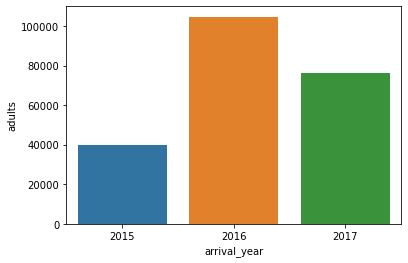

In [35]:
bdata = hotel.groupby('arrival_year',as_index=False)['adults'].sum()
sns.barplot(x='arrival_year', y='adults', data=bdata)

Vẽ pie chart thể hiện % của các loại meal hoặc meal_service

In [39]:
def pie(data,label,col,title=None,figsize = (12,8),fontsize=14):
    plt.figure(figsize = figsize)
    labels = data[label]
    plt.pie(x=data[col], autopct="%.1f%%", explode=[0.05]*data[label].count(), labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=fontsize)

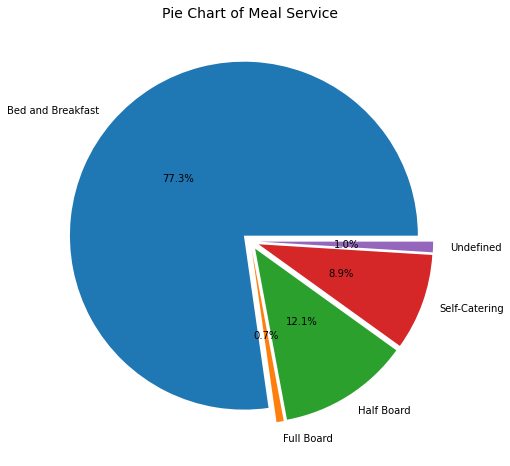

In [40]:
df = hotel.groupby('meal_service').size().reset_index(name='count')
pie(data=df,label='meal_service',col='count',title='Pie Chart of Meal Service',figsize = (12,8),fontsize=14)

In [ ]:
Vẽ box plot thể hiện lead_time theo từng customer_type

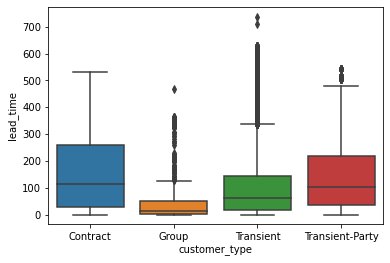

In [41]:
sns.boxplot(data=hotel, x='customer_type', y='lead_time')